# Running the same on Quantum computer

In [32]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute
from math import pi
import matplotlib.pyplot as plt
from qiskit import Aer

In [33]:
from qiskit import IBMQ

In [34]:
import Qconfig
use_local_simulator = True

try:
    register(Qconfig.APItoken, Qconfig.config['url'])
    print('Access to IBM Q-Aqua')
    print('- - - - - - - - - - - - - - - - - - - - - - - - -')
    print('\n')
    print("Available machines:")
    print(available_backends({'local': use_local_simulator, 'simulator': use_local_simulator}))
    #backend = least_busy(available_backends({'simulator': use_local_simulator, 'local': use_local_simulator}))
    print('Using ' + backend + ' as hardware to process query.')
except:
    ('Authorization failed, aborting')

In [35]:
IBMQ.load_accounts()

/home/chris/.local/lib/python3.6/site-packages/qiskit/backends/ibmq/ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [36]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [37]:
from qiskit.backends.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] >= 6 and
                                                       not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [38]:
def entangle_qft(number_of_qbits:int = 6):
    qr = QuantumRegister(number_of_qbits)
    cr = ClassicalRegister(number_of_qbits)
    circuit = QuantumCircuit(qr, cr)
            
    for i in range(len(qr)):
        for j in range(i):
            circuit.cu1(pi/float(2**(i-j)),qr[i], qr[j])
        #if i != 0:
        #    circuit.cx(qr[i],qr[i-1])
        circuit.h(qr[i])
    for i in range(len(qr)):    
        if i != 0:
            circuit.cx(qr[i],qr[i-1])
    
    # measure gate from qr to cr
    circuit.measure(qr, cr)
        
    return circuit

In [39]:
from qiskit.wrapper.jupyter import *

In [40]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

In [42]:
circuit = entangle_qft()
job = execute(circuit, backend=backend, shots=shots, max_credits=max_credits)

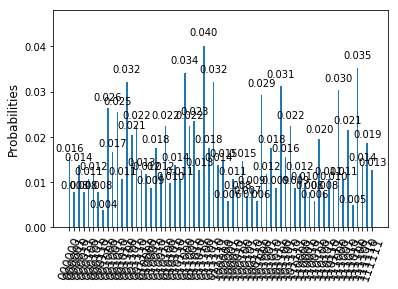

In [43]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

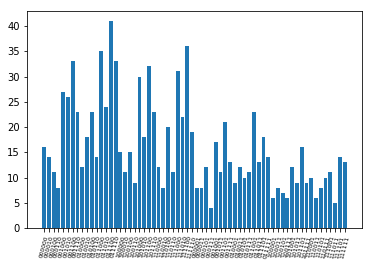

In [44]:
fig, ax = plt.subplots(1, 1)
ax.bar(*list(zip(*counts.items())))
ax.set_xticklabels([i for i in counts.keys()], rotation=75, size=6)
plt.plot();